# Лабораторная работа №2

ФИО: Клюшова Полина Алексеевна  
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Импорт данных
Датасет spotify-2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/spotify-2023.csv'
data = pd.read_csv(url, sep=',', encoding='latin-1')
data

Mounted at /content/drive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## 2. Описание постановки задачи

In [2]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Примем streams за целевую переменную (y). Тогда задача регрессии будет следующей:



**Цель:**
 предсказать целевую переменную, которая характеризует популярность трека,  на основе его признаков (x)

**Переменные в датасете:**

Основные атрибуты трека:
track_name
artist(s)_name
artist_count

Дата выхода трека: released_year, released_month, released_day

Информация о нахождении в плейлистах и чартах:
in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts

Количество прослушиваний: streams

Аудиохарактеристики трека: bpm,
key, mode,
danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%



**Целевая переменная** - streams (предсказание числа стримов) - является непрерывной числовой переменной, так как ее значения могут меняться от 0 до +беск.

## 3. Распределение целевой переменной

In [3]:
data['streams']

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322
...,...
948,91473363
949,121871870
950,73513683
951,133895612


Распределение целевой переменной в виде гистограммы:

<Axes: >

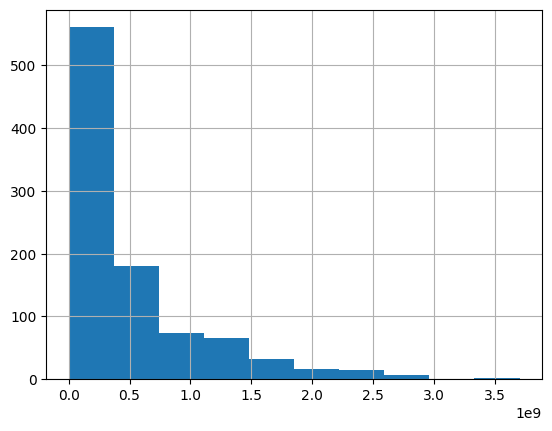

In [4]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data["streams"].hist()

По графику видно, что большая часть значений целевой переменной располагается в диапазоне ближе к 0.

Данные не однородны.

Данные не сбалансированы, так как популярные треки бывают редко.


In [5]:
data['streams'].nunique()

948

Большое количество уникальных значений подтверждает непрерывность переменной

# 4.Основные статистики по переменным

In [6]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# 5. Основная информация по датасету

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

# 6. Количество пропусков элементов

In [8]:
data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0



Пропуски значений могут быть вызваны:


*   streams - ошибка ввода данных

Можно заменить пропуск на среднее значение по этому стоблцу
*   in_shazam_charts - отсутствие трека в чартах шазама

Можно заменить пропуски на 0
*   key - отсутствие данных о тональности

Так как столбец не сильно важен, пропуски можно оставить, либо можно заменить пропуски на наиболее часто встречающееся значение



# 7. Гистограммы 5 признаков

<Axes: >

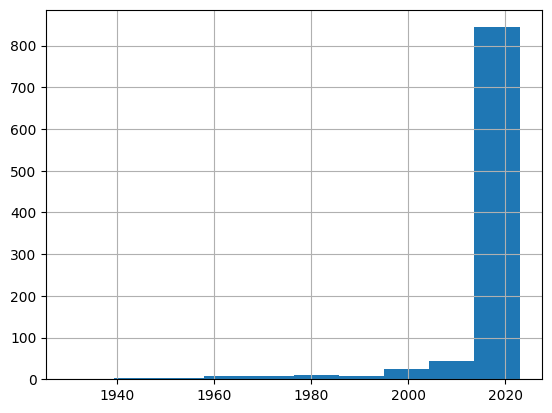

In [9]:
data["released_year"].hist()

Большинство значений года выхода сконцентрировано около 2020

<Axes: >

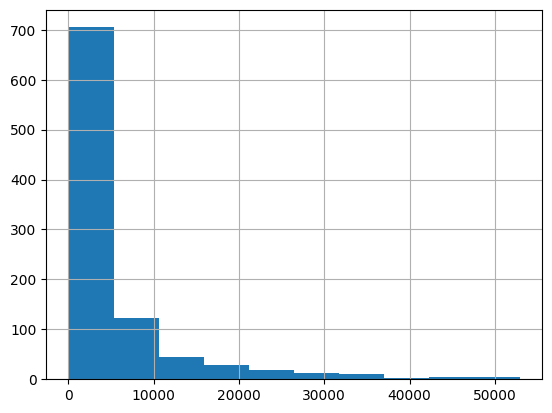

In [10]:
data["in_spotify_playlists"].hist()

Большая часть значений количества добавлений в плейлисты спотифая находится от 0 до 50000

<Axes: >

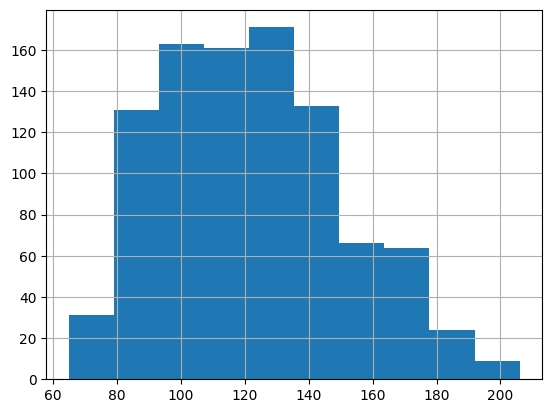

In [11]:
data["bpm"].hist()

Распределение значений темпа ближе к нормальному. График немного смещен влево.

<Axes: >

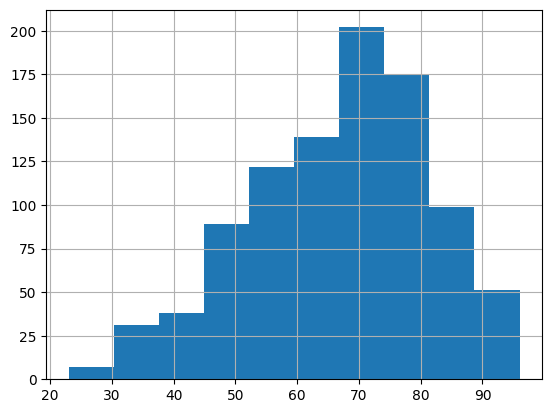

In [12]:
data['danceability_%'].hist()

График распределения значений 'danceability_%' смещен вправо

<Axes: >

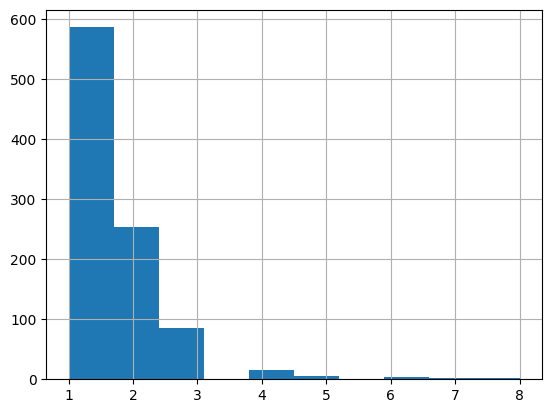

In [13]:
data['artist_count'].hist()

Большинство треков принадлежат 1 или 2 исполнителям

# Графики зависимости 5 переменных от целевой

<Axes: xlabel='released_year', ylabel='streams'>

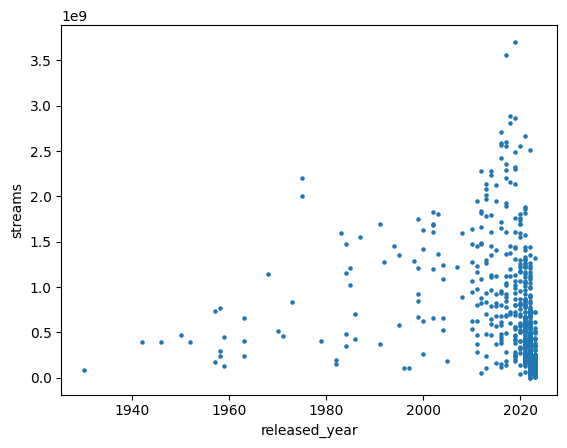

In [24]:
data.plot(x='released_year', y='streams', kind='scatter', s=5)

Наблюдается небольшая прямая зависимость

<Axes: xlabel='in_apple_playlists', ylabel='streams'>

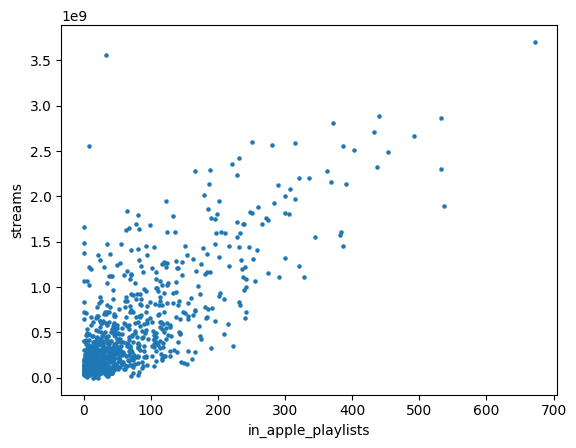

In [25]:
data.plot(x='in_apple_playlists', y='streams', kind='scatter', s=5)

Видна прямая корреляция, переменную можно использовать для прогнозирования

<Axes: xlabel='bpm', ylabel='streams'>

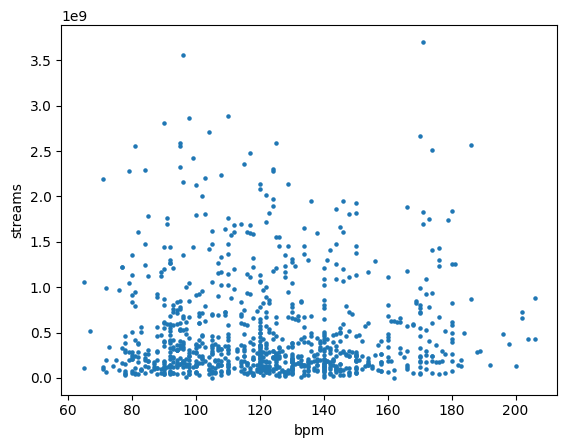

In [26]:
data.plot(x='bpm', y='streams', kind='scatter', s=5)

Явная зависимость не прослеживается

<Axes: xlabel='energy_%', ylabel='streams'>

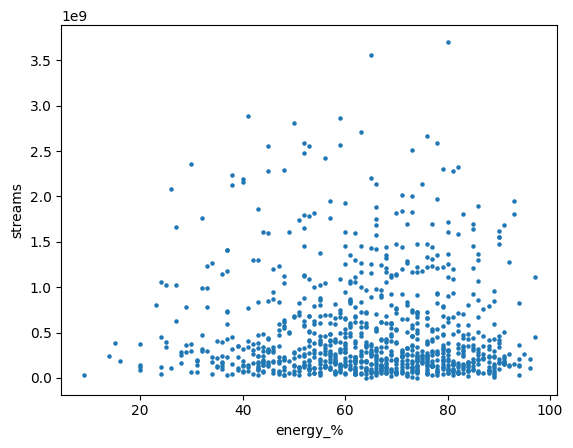

In [27]:
data.plot(x='energy_%', y='streams', kind='scatter', s=5)

Зависимость не прослеживается

<Axes: xlabel='speechiness_%', ylabel='streams'>

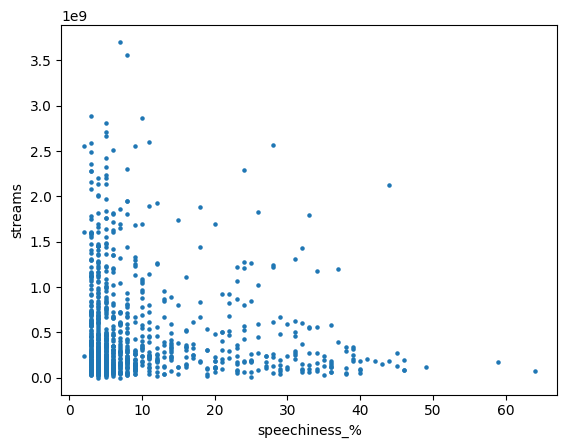

In [28]:
data.plot(x='speechiness_%', y='streams', kind='scatter', s=5)

Прослеживается гиперболическая зависимость